##  Imports 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam

##  1. Load CSV 

In [30]:
file_path = '../test_csv/motor_temp_high.csv'  # Change this to your file
df = pd.read_csv(file_path).dropna()

# Ensure timestamp is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check for irregular time gaps
df['time_diff'] = df['timestamp'].diff()
print("⏱️ Time difference check near anomaly window:")
display(df[df['timestamp'].between("2025-04-07 05:58:00", "2025-04-07 06:06:00")][['timestamp', 'time_diff', 'state', 'feature_0']])

# (Optional fix) If irregular: uncomment this to resample to regular 1-minute intervals
# df = df.set_index('timestamp').resample('1T').ffill().reset_index()

# Drop helper column
df = df.drop(columns=['time_diff'])

# Detect numeric feature(s)
time_col = 'timestamp'
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()

⏱️ Time difference check near anomaly window:


,timestamp,time_diff,state,feature_0
358,2025-04-07 05:58:00,0 days 00:01:00,run,63.170087
359,2025-04-07 05:59:00,0 days 00:01:00,run,61.922980
360,2025-04-07 06:00:00,0 days 00:01:00,run,63.374250
361,2025-04-07 06:01:00,0 days 00:01:00,run,63.489445
362,2025-04-07 06:02:00,0 days 00:01:00,run,62.333537
363,2025-04-07 06:03:00,0 days 00:01:00,run,63.284326
364,2025-04-07 06:04:00,0 days 00:01:00,run,64.603240
365,2025-04-07 06:05:00,0 days 00:01:00,run,65.785527
366,2025-04-07 06:06:00,0 days 00:01:00,run,64.411444
1797,2025-04-07 05:58:00,0 days 00:01:00,run,102.354984


## 2. Group by states

📋 Detected states: ['idle', 'off', 'run']

🚀 Processing state: idle
Epoch 1/10


c:\Users\Thomas\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3055
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0958
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0491
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0224
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
📊 Threshold (95th percentile): 0.058653


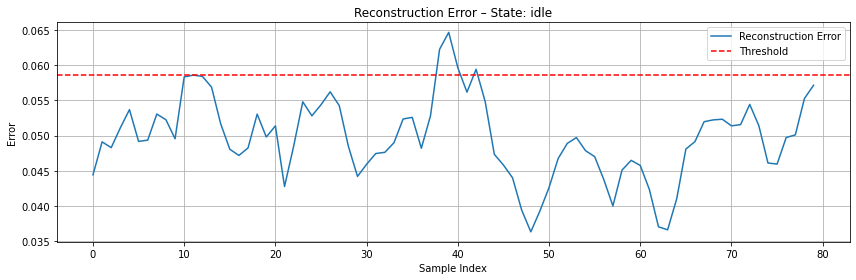


🚀 Processing state: off
Epoch 1/10


c:\Users\Thomas\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3607
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1415
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0589
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0343
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
📊 Threshold (95th percentile): 0.031890


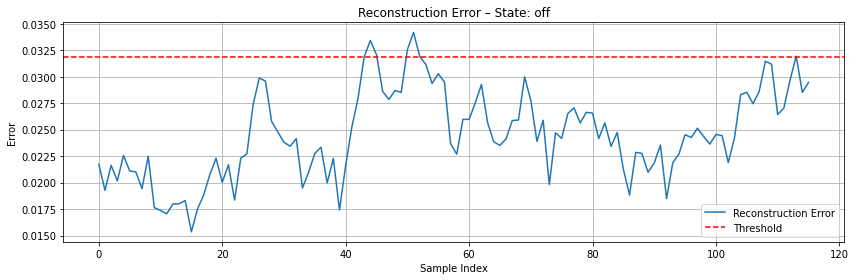


🚀 Processing state: run
Epoch 1/10


c:\Users\Thomas\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1045
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.2111e-04
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9712e-04
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0054e-04
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2705e-04
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.9400e-04
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1073e-04
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
📊 Threshold (95th percentile): 0.032935


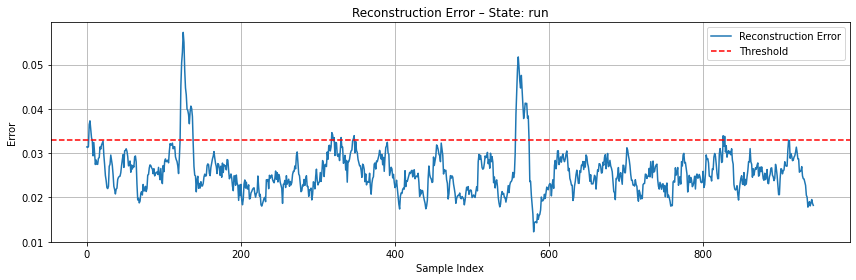

In [31]:
grouped = df.groupby('state')
print("📋 Detected states:", list(grouped.groups.keys()))

all_state_results = []

def create_sequences(data, window=20):
    return np.array([data[i:i+window] for i in range(len(data) - window)])

for state, group in grouped:
    print(f"\n🚀 Processing state: {state}")
    data = group.copy()
    data_features = data[feature_cols].values

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data_features)

    seq_len = 20
    X = create_sequences(scaled, seq_len)
    if len(X) < 100:
        print(f"⚠️ Not enough sequences for state '{state}', skipping...")
        continue

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]

    model = Sequential([
        LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
        RepeatVector(X.shape[1]),
        LSTM(64, activation='relu', return_sequences=True),
        TimeDistributed(Dense(X.shape[2]))
    ])
    model.compile(optimizer=Adam(1e-3), loss='mse')
    model.fit(X_train, X_train, epochs=10, batch_size=32, verbose=1)

    X_pred = model.predict(X_test)
    errors = np.mean(np.abs(X_pred - X_test), axis=(1, 2))
    threshold = np.percentile(errors, 95)
    print(f"📊 Threshold (95th percentile): {threshold:.6f}")

    # Plot error
    plt.figure(figsize=(12, 4))
    plt.plot(errors, label='Reconstruction Error')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.title(f"Reconstruction Error – State: {state}")
    plt.xlabel("Sample Index")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [32]:
timestamps = group.iloc[seq_len + split:seq_len + len(X)].reset_index(drop=True)[time_col].values
min_len = min(len(X_test), len(timestamps))
errors = errors[:min_len]
timestamps = timestamps[:min_len]
is_anomaly = (errors > threshold).astype(int)

df_state = pd.DataFrame({
    'timestamp': timestamps,
    'state': state,
    'reconstruction_error': errors,
    'is_anomaly': is_anomaly
})
all_state_results.append(df_state)

# Combine predictions from all states
all_anomalies_df = pd.concat(all_state_results, ignore_index=True)
all_anomalies_df = all_anomalies_df.sort_values(by='timestamp')

# Stage 3: State Transition Filtering
transition_window = 3
df = all_anomalies_df.copy().reset_index(drop=True)
df['is_transition'] = 0

for i in range(1, len(df)):
    if df.loc[i, 'state'] != df.loc[i - 1, 'state']:
        for j in range(i - transition_window, i + transition_window + 1):
            if 0 <= j < len(df):
                df.loc[j, 'is_transition'] = 1

print("🔍 Sample with transition flags:")
display(df[df['is_transition'] == 1].head(10))

filtered_anomalies = df[(df['is_anomaly'] == 1) & (df['is_transition'] == 0)]
print(f"✅ Final filtered anomalies (after Stage 3): {len(filtered_anomalies)} rows")
display(filtered_anomalies.head(10))


🔍 Sample with transition flags:


,timestamp,state,reconstruction_error,is_anomaly,is_transition


✅ Final filtered anomalies (after Stage 3): 48 rows


,timestamp,state,reconstruction_error,is_anomaly,is_transition
3,2025-04-07 06:03:00,run,0.036464,1,0
4,2025-04-07 06:04:00,run,0.037312,1,0
5,2025-04-07 06:05:00,run,0.035353,1,0
6,2025-04-07 06:06:00,run,0.033489,1,0
121,2025-04-07 09:31:00,run,0.032946,1,0
122,2025-04-07 09:32:00,run,0.045227,1,0
123,2025-04-07 09:33:00,run,0.050463,1,0
124,2025-04-07 09:34:00,run,0.052806,1,0
125,2025-04-07 09:35:00,run,0.057294,1,0
126,2025-04-07 09:36:00,run,0.055058,1,0


## State Transition Filtering

🔍 Raw sensor values near anomaly:


,timestamp,feature_0,state
360,2025-04-07 06:00:00,63.374250,run
361,2025-04-07 06:01:00,63.489445,run
362,2025-04-07 06:02:00,62.333537,run
363,2025-04-07 06:03:00,63.284326,run
364,2025-04-07 06:04:00,64.603240,run
365,2025-04-07 06:05:00,65.785527,run
366,2025-04-07 06:06:00,64.411444,run
1799,2025-04-07 06:00:00,102.569604,run
1800,2025-04-07 06:01:00,102.359242,run
1801,2025-04-07 06:02:00,101.811212,run


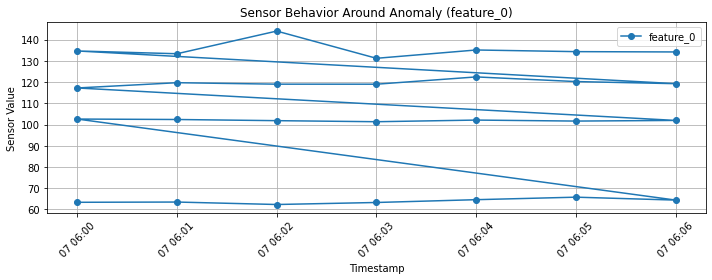

In [34]:

df_raw = pd.read_csv(file_path).dropna()
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])
df_zoom = df_raw[df_raw['timestamp'].between("2025-04-07 06:00:00", "2025-04-07 06:06:00")]
print("🔍 Raw sensor values near anomaly:")
display(df_zoom[['timestamp', 'feature_0', 'state']])

plt.figure(figsize=(10, 4))
plt.plot(df_zoom['timestamp'], df_zoom['feature_0'], marker='o', label='feature_0')
plt.xticks(rotation=45)
plt.title("Sensor Behavior Around Anomaly (feature_0)")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
